# Data analysis

In [1]:
#Importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from math import radians

In [2]:
#loading the dataset
data=pd.read_csv('train.csv')

data.head() #to observe the dataset

hour  small_part  med_part  sulf_diox  nitr_diox  trioxygen  temp    pres  \
0    23        13.0      43.0        1.0       19.0       29.0   7.6  1021.3   
1    21        77.0     115.0       31.0       74.0       10.0   0.0  1015.0   
2    21        86.0     141.0        9.0       43.0      198.0  29.3  1000.9   
3    11         NaN       NaN        NaN        NaN       20.0  14.2  1015.2   
4     0        77.0      57.0       41.0       48.0       16.0  -1.0  1024.2   

   rain wind  wind_sp         date  carb_monox  
0   0.0  NNW      2.5  23-Oct-2014     200.000  
1   0.0    W      0.7   9-Jan-2016    2100.000  
2   0.0  SSE      0.4  11-Jul-2016     700.000  
3   0.0  ESE      1.9  29-Oct-2015    1222.923  
4   0.0  SSW      1.3   7-Feb-2015    1300.000

In [3]:
print(data.columns)
data.info()

Index(['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'rain', 'wind', 'wind_sp', 'date', 'carb_monox'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 13 columns):
hour          14000 non-null int64
small_part    13668 non-null float64
med_part      13749 non-null float64
sulf_diox     13691 non-null float64
nitr_diox     13662 non-null float64
trioxygen     13563 non-null float64
temp          13985 non-null float64
pres          13986 non-null float64
rain          13985 non-null float64
wind          13955 non-null object
wind_sp       13989 non-null float64
date          14000 non-null object
carb_monox    14000 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.4+ MB


In [4]:
data.describe()

hour    small_part      med_part     sulf_diox     nitr_diox  \
count  14000.000000  13668.000000  13749.000000  13691.000000  13662.000000   
mean      11.622429     78.745237    103.551407     16.060271     52.454812   
std        6.935469     80.126449     91.394438     21.762748     35.094642   
min        0.000000      2.000000      2.000000      0.285600      2.000000   
25%        6.000000     20.000000     35.000000      3.000000     25.000000   
50%       12.000000     53.000000     79.000000      7.996800     44.980350   
75%       18.000000    110.000000    144.000000     19.000000     73.000000   
max       23.000000    713.000000    992.000000    229.000000    277.000000   

          trioxygen          temp          pres          rain       wind_sp  \
count  13563.000000  13985.000000  13986.000000  13985.000000  13989.000000   
mean      57.334871     13.758687   1009.740036      0.067265      1.756351   
std       56.569558     11.427620     10.529981      0.815876      1.238664   
min        0.214200    -15.900000    982.400000      0.000000      0.000000   
25%       11.000000      3.300000   1001.000000      0.000000      0.900000   
50%       45.000000     14.800000   1009.400000      0.000000      1.400000   
75%       81.590900     23.400000   1018.000000      0.000000      2.200000   
max      423.000000     39.800000   1042.000000     33.700000     10.000000   

         carb_monox  
count  14000.000000  
mean    1233.604101  
std     1174.657678  
min      100.000000  
25%      500.000000  
50%      900.000000  
75%     1400.000000  
max    10000.000000

In [5]:
# Check for Null values
data.isnull().sum()

hour            0
small_part    332
med_part      251
sulf_diox     309
nitr_diox     338
trioxygen     437
temp           15
pres           14
rain           15
wind           45
wind_sp        11
date            0
carb_monox      0
dtype: int64

## Univariate analysis - Target variable

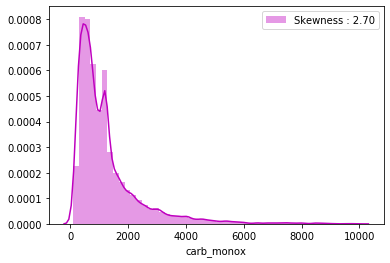

In [6]:
#let's compute skewness of the target variable
g = sns.distplot(data["carb_monox"], color="m", label="Skewness : %.2f"%(data["carb_monox"].skew()))
g = g.legend(loc="best")
#Deviates from the normal distribution.
#Has appreciable skewness.
#Shows peakedness.

In [7]:
#skewness and kurtosis
print("Skewness: %f" % data['carb_monox'].skew())
print("Kurtosis: %f" % data['carb_monox'].kurt())

Skewness: 2.695517
Kurtosis: 9.883100


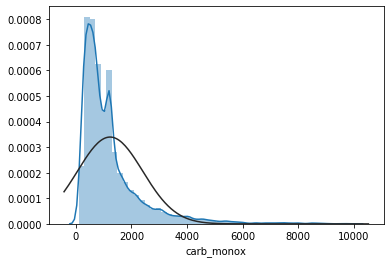

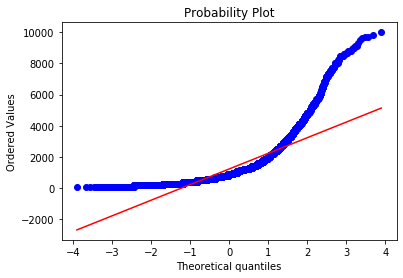

In [8]:
#histogram and normal probability plot
sns.distplot(data['carb_monox'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['carb_monox'], plot=plt)

In [9]:
data['carb_monox'].describe()
#'Very well... It seems that the minimum value for carb_monox is larger than zero. 

count    14000.000000
mean      1233.604101
std       1174.657678
min        100.000000
25%        500.000000
50%        900.000000
75%       1400.000000
max      10000.000000
Name: carb_monox, dtype: float64

## Univariate analysis - Explanatory variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F7453C8>]],
      dtype=object)

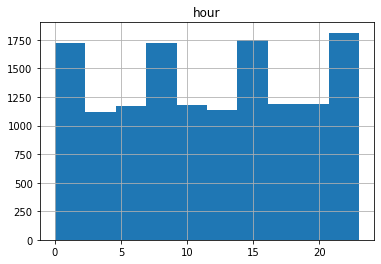

In [10]:
data.hist(column='hour')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F739948>]],
      dtype=object)

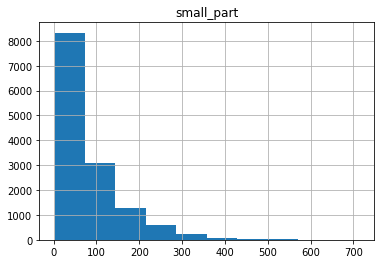

In [11]:
data.hist(column='small_part')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F6EB1C8>]],
      dtype=object)

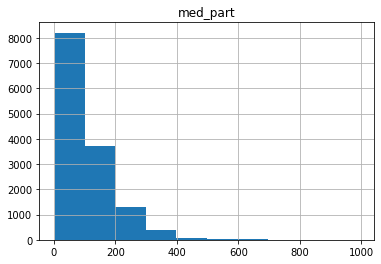

In [12]:
data.hist(column='med_part')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F804348>]],
      dtype=object)

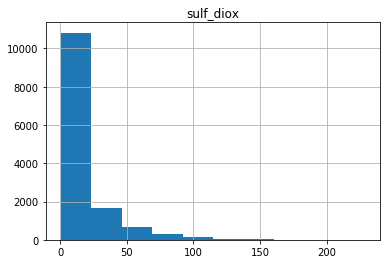

In [13]:
data.hist(column='sulf_diox')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F79D0C8>]],
      dtype=object)

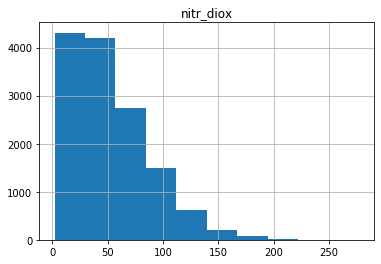

In [14]:
data.hist(column='nitr_diox')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F8F5B88>]],
      dtype=object)

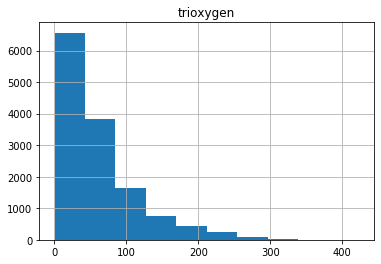

In [15]:
data.hist(column='trioxygen')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F9721C8>]],
      dtype=object)

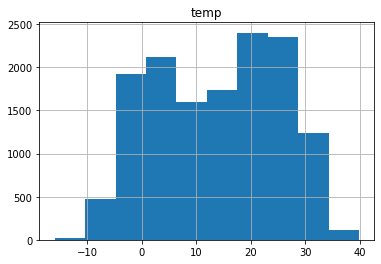

In [16]:
data.hist(column='temp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779F9F4288>]],
      dtype=object)

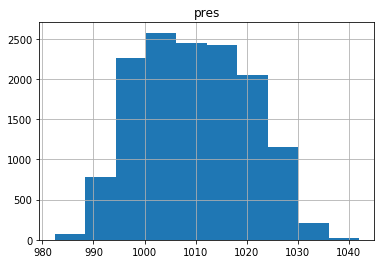

In [17]:
data.hist(column='pres')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779FA48C08>]],
      dtype=object)

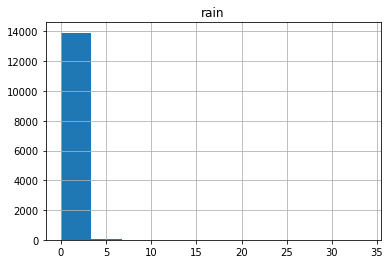

In [18]:
data.hist(column='rain')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001779FAC77C8>]],
      dtype=object)

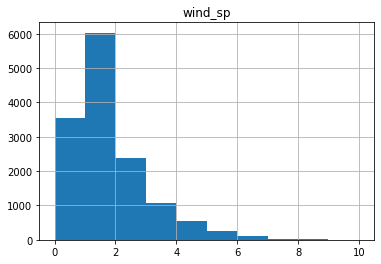

In [19]:
data.hist(column='wind_sp')

## Bivariate analysis

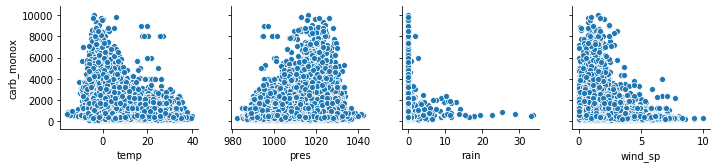

In [20]:
# visualize the relationship between the features and the target using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(data, x_vars=['temp', 'pres', 'rain', 'wind_sp'],  y_vars='carb_monox')

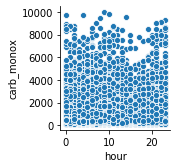

In [21]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(data, x_vars=['hour'],  y_vars='carb_monox')

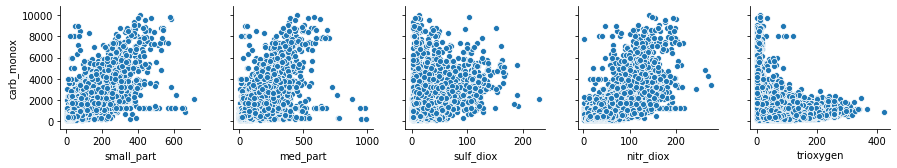

In [22]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(data, x_vars=['small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen'],  y_vars='carb_monox')

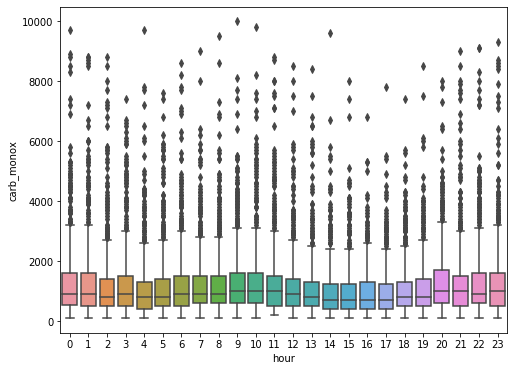

In [23]:
#box plot carb_monox/hour
var = 'hour'
df = pd.concat([data['carb_monox'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="carb_monox", data=df)


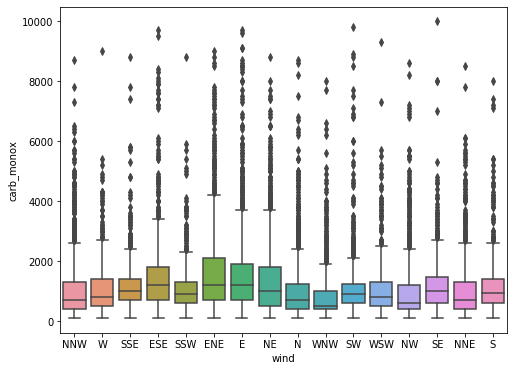

In [24]:
#box plot carb_monox/wind
var = 'wind'
df = pd.concat([data['carb_monox'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="carb_monox", data=df)


## Scatterplot

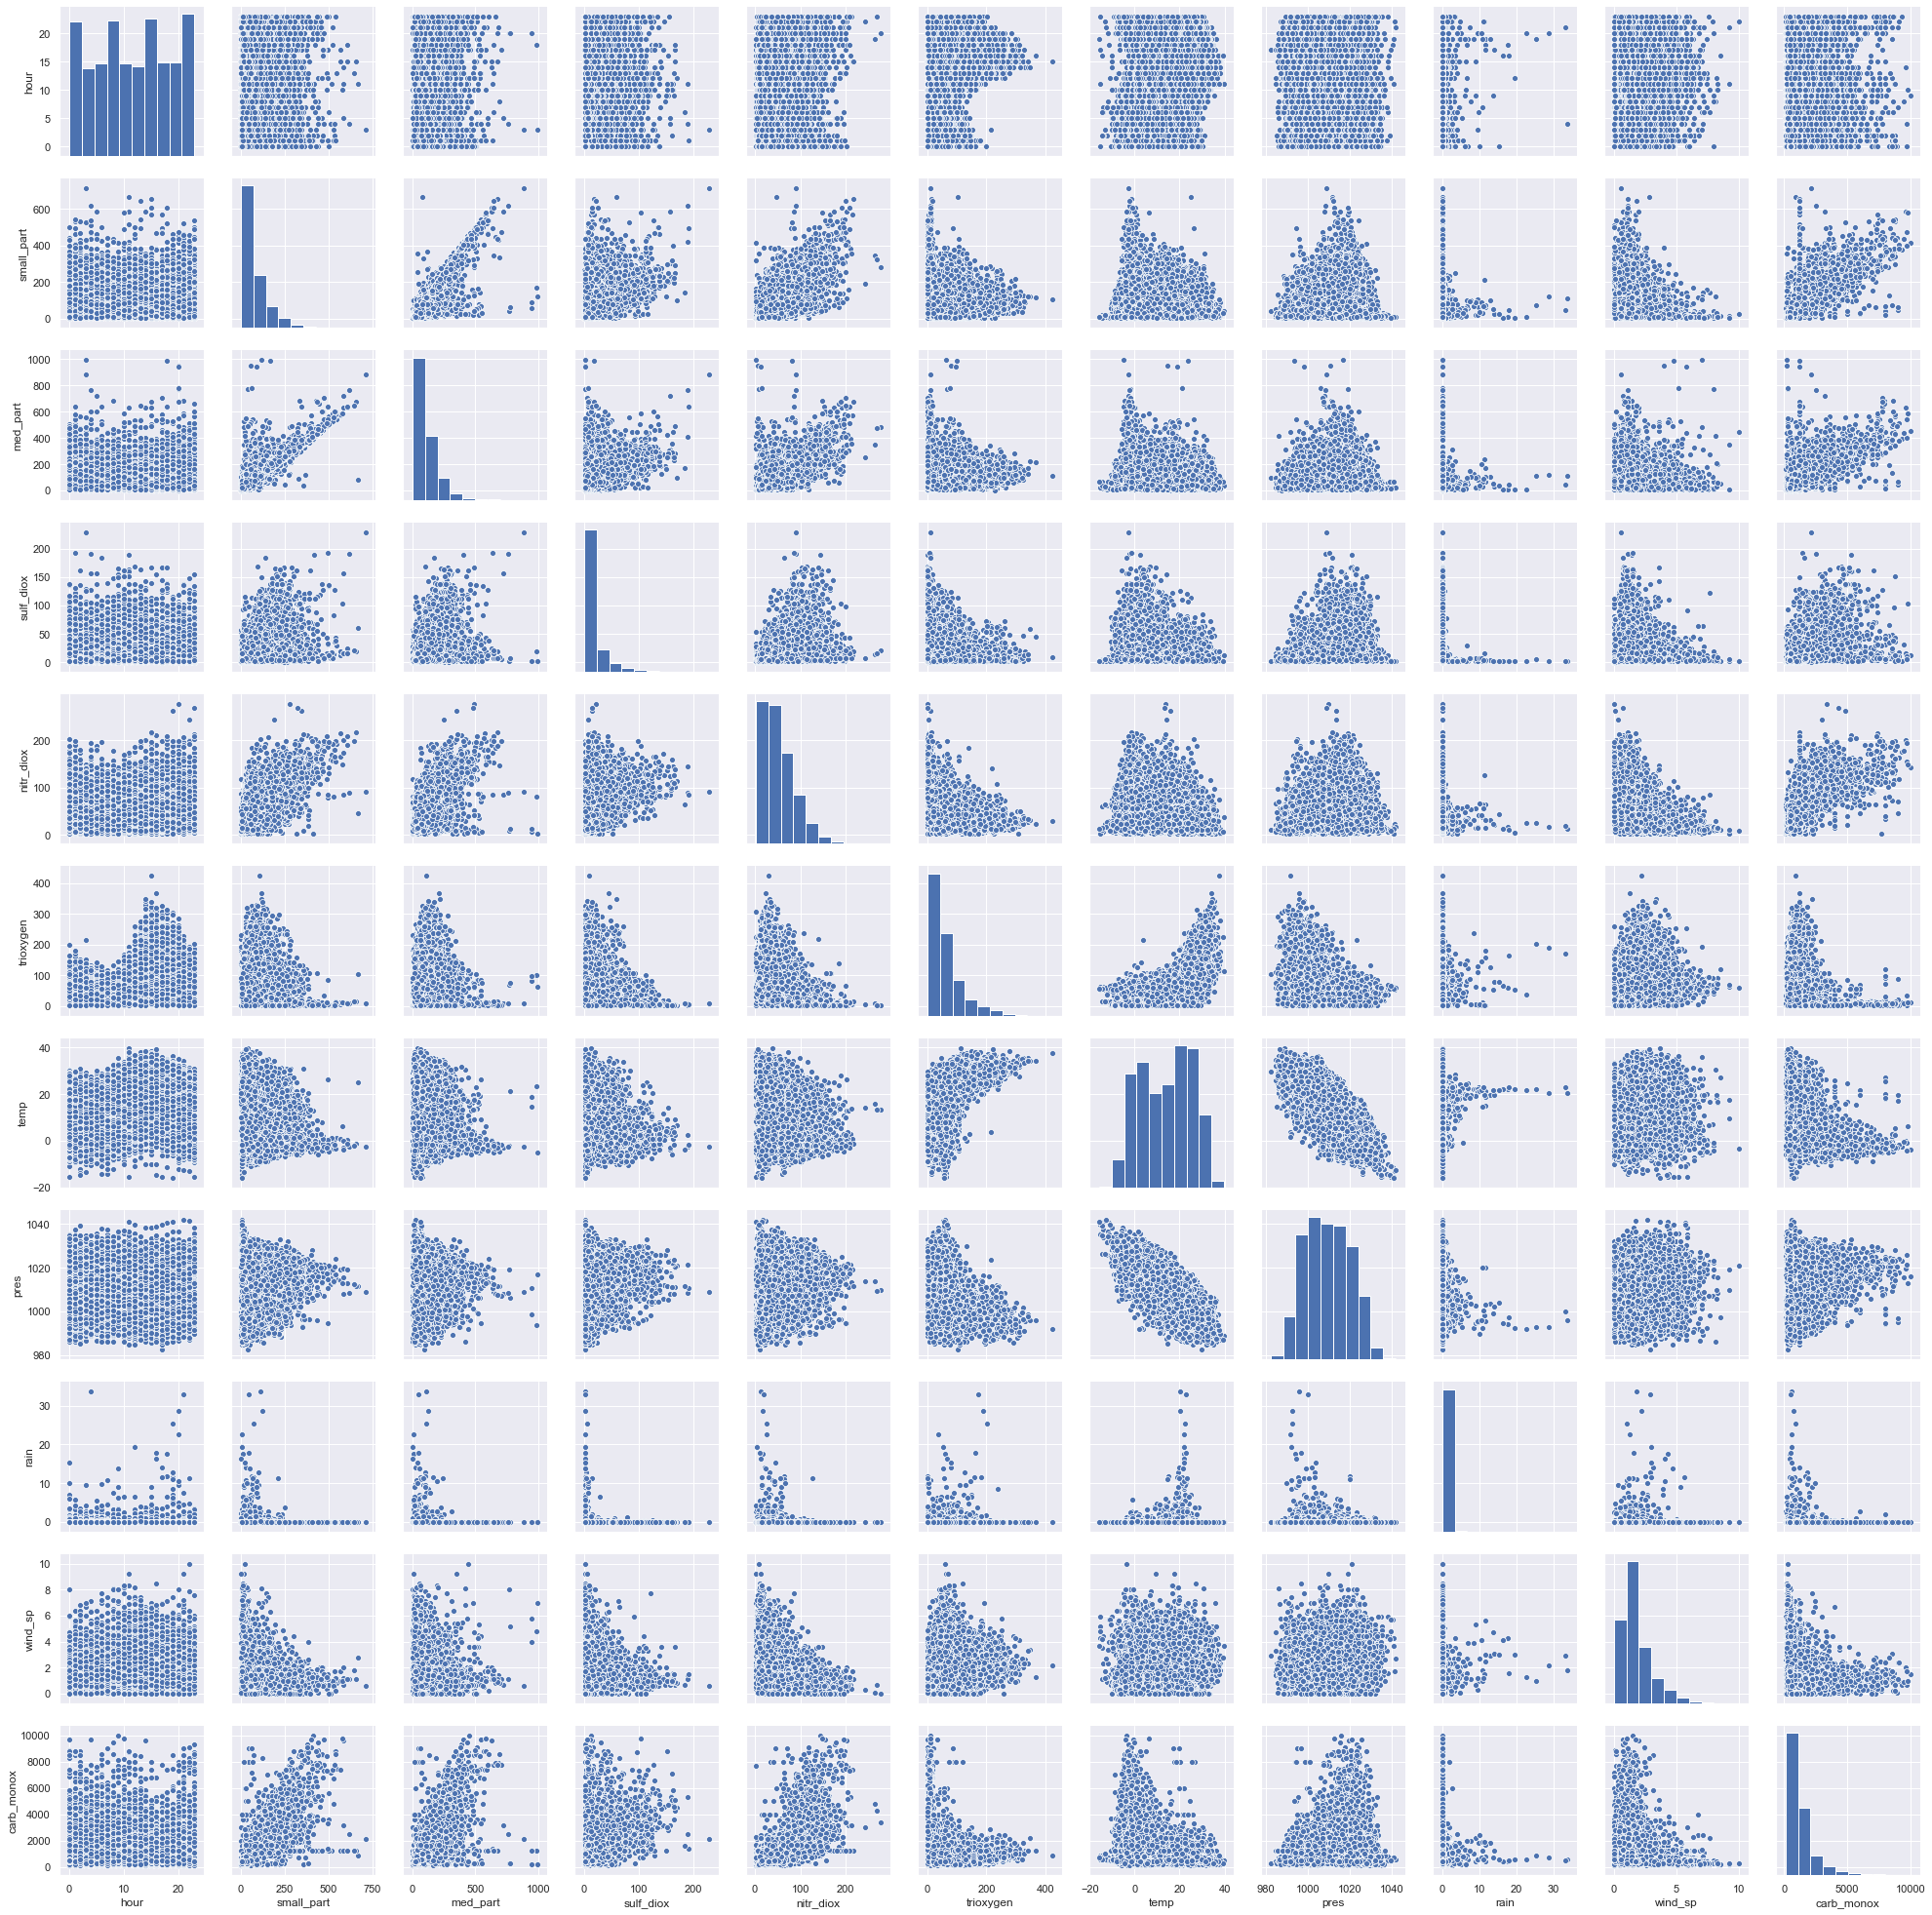

In [25]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.5)
plt.show();

# Correlation

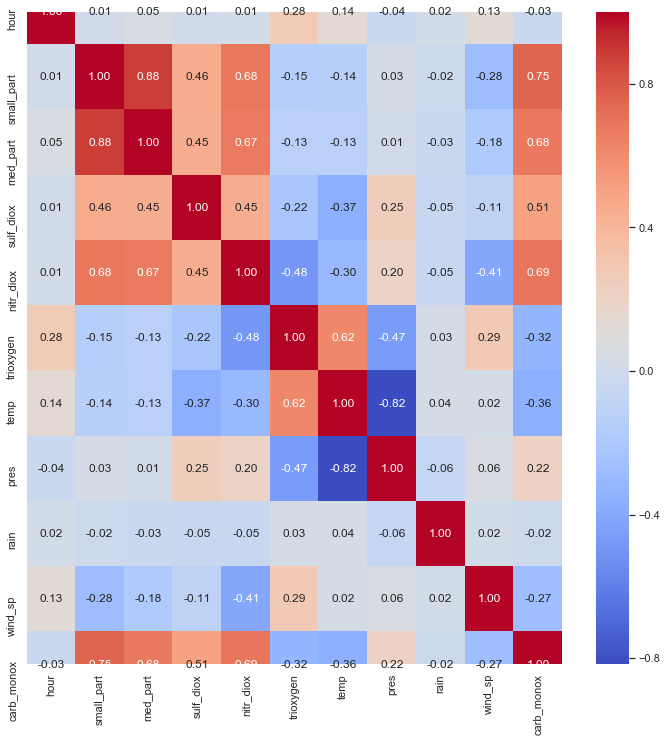

In [26]:
#heatmap for numerical variables
fig, ax = plt.subplots(figsize=(12,12))
g = sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",ax=ax)
#there appears to be small correlations between the variables

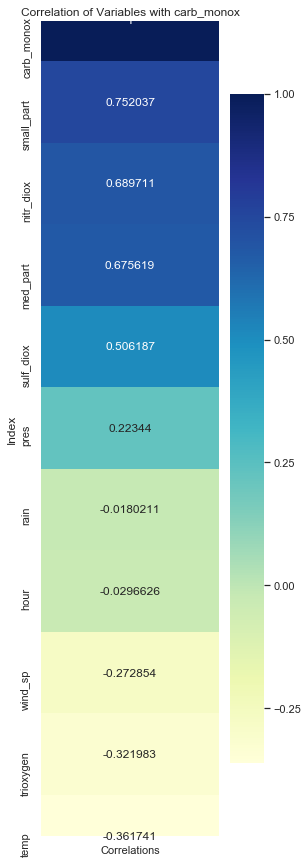

In [27]:
#correlation with carb_monox
corr = data.corrwith(data['carb_monox']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with carb_monox")
plt.show()

# Exploring missing data

In [28]:
#How prevalent is the missing data?

In [29]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

Missing Ratio
trioxygen        3.121429
nitr_diox        2.414286
small_part       2.371429
sulf_diox        2.207143
med_part         1.792857
wind             0.321429
rain             0.107143
temp             0.107143
pres             0.100000
wind_sp          0.078571

Text(0.5, 1.0, 'Percent missing data by feature')

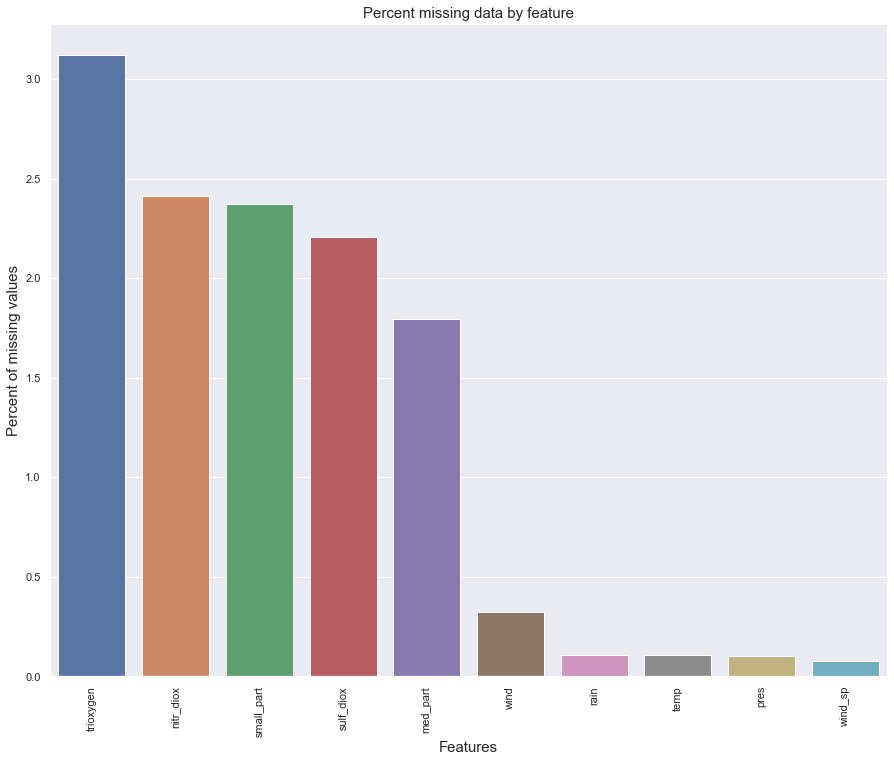

In [30]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Feature engineering

In [31]:

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
#from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import math
from math import radians
data=pd.read_csv('train.csv')
w_map={'N':radians(0),'NNE':radians(22.5), 'NE':radians(45),
           'ENE':radians(67.5),'E':radians(90), 'ESE':radians(112.5),
           'SE':radians(135),'SSE':radians(157.5),'S':radians(180),
           'SSW':radians(202.5),'SW':radians(225),'WSW':radians(247.5),
           'W':radians(270),'WNW':radians(292.5),'NW':radians(315),
           'NNW':radians(337.5)
       }
data['wind']=data.wind.map(w_map)
date=data['date']
days=data['date']
timedate=data['hour']

from datetime import datetime
for x in range (14000):
        date[x]=date[x].replace("Jan", "1")
        date[x]=date[x].replace("Feb", "2")
        date[x]=date[x].replace("Mar", "3")
        date[x]=date[x].replace("Apr", "4")
        date[x]=date[x].replace("May", "5")
        date[x]=date[x].replace("Jun", "6")
        date[x]=date[x].replace("Jul", "7")
        date[x]=date[x].replace("Aug", "8")
        date[x]=date[x].replace("Sep", "9")
        date[x]=date[x].replace("Oct", "10")
        date[x]=date[x].replace("Nov", "11")
        date[x]=date[x].replace("Dec", "12")
        if date[x]!='29-Feb-2017' and date[x]!='29-2-2017':
            timedate[x]=date[x]+' '+str( timedate[x])
            timedate[x]=datetime.strptime(timedate[x], "%d-%m-%Y %H") 
date=timedate
import datetime
date[2132]=datetime.datetime(2017, 3, 1, 19, 0) 
date[5952]=datetime.datetime(2017, 3, 1, 16, 0)  
date[7186]=datetime.datetime(2017, 3, 1, 13, 0)
date[7342]=datetime.datetime(2017, 3, 1, 21, 0) 
date[7646]=datetime.datetime(2017, 3, 1, 21, 0)
date[7937]=datetime.datetime(2017, 3, 1, 21, 0) 
date[8469]=datetime.datetime(2017, 2, 28, 11, 0)  
date[8595]=datetime.datetime(2017, 2, 28, 1, 0)
date[8737]=datetime.datetime(2017, 2, 28, 7, 0)
date[11076]=datetime.datetime(2017, 2, 28, 0, 0)
date[11474]=datetime.datetime(2017, 2, 28, 6, 0) 
date[11947]=datetime.datetime(2017, 2, 28, 4, 0)
date[13893]=datetime.datetime(2017, 3, 1, 12, 0)
for x in range (14000):
    days[x]=int(((date[x]-datetime.datetime(2014,1,1)).total_seconds())/86400)+1
    date[x]=((date[x]-datetime.datetime(2014,1,1)).total_seconds())/3600
    if days[x]<=365:
        days[x]=days[x]
    elif days[x]>365 and days[x]<=730:
        days[x]-=365
    elif days[x]>730 and days[x]<=790:
        days[x]-=730
    elif days[x]>790 and days[x]<=1096:
        days[x]-=731
    elif days[x]>1096 and days[x]<=1461:
        days[x]-=1096
    elif days[x]>1461:
        days[x]-=1461

In [32]:
for x in range (14000):
    data['date'][x]=(data['date'][x]/365)*2*(math.pi)
#mapping the date into radians
data['date']=data['date'].astype(float)
data['hour']=data['hour'].astype(float)

In [33]:
#creating sine and cosine columns
cosine=data['date'].copy()
cosine=np.cos(cosine)
cosine=pd.DataFrame(cosine)
cosine.rename({'date': 'cos'}, axis=1,inplace=True)
sine=data['date'].copy()
sine=np.sin(data['date'])
sine=pd.DataFrame(sine)
sine.rename({'date': 'sin'}, axis=1,inplace=True)
data=pd.concat([data,sine,cosine],1)

In [34]:
#sorting the dataset by ascending time
data.sort_values(by=['hour'], axis=0, ascending=True, inplace=True, kind='mergesort')
data=(data.ffill()+data.bfill())/2
#data=data.ffill().bfill() <- tried also this but thought that the mean was better

In [35]:
#save target variable
target=pd.DataFrame(data['carb_monox'])
data.drop('carb_monox',1,inplace=True)

#sort by index again
data.sort_index( axis=0, ascending=True, inplace=True, kind='mergesort')
target.sort_index( axis=0, ascending=True, inplace=True, kind='mergesort')

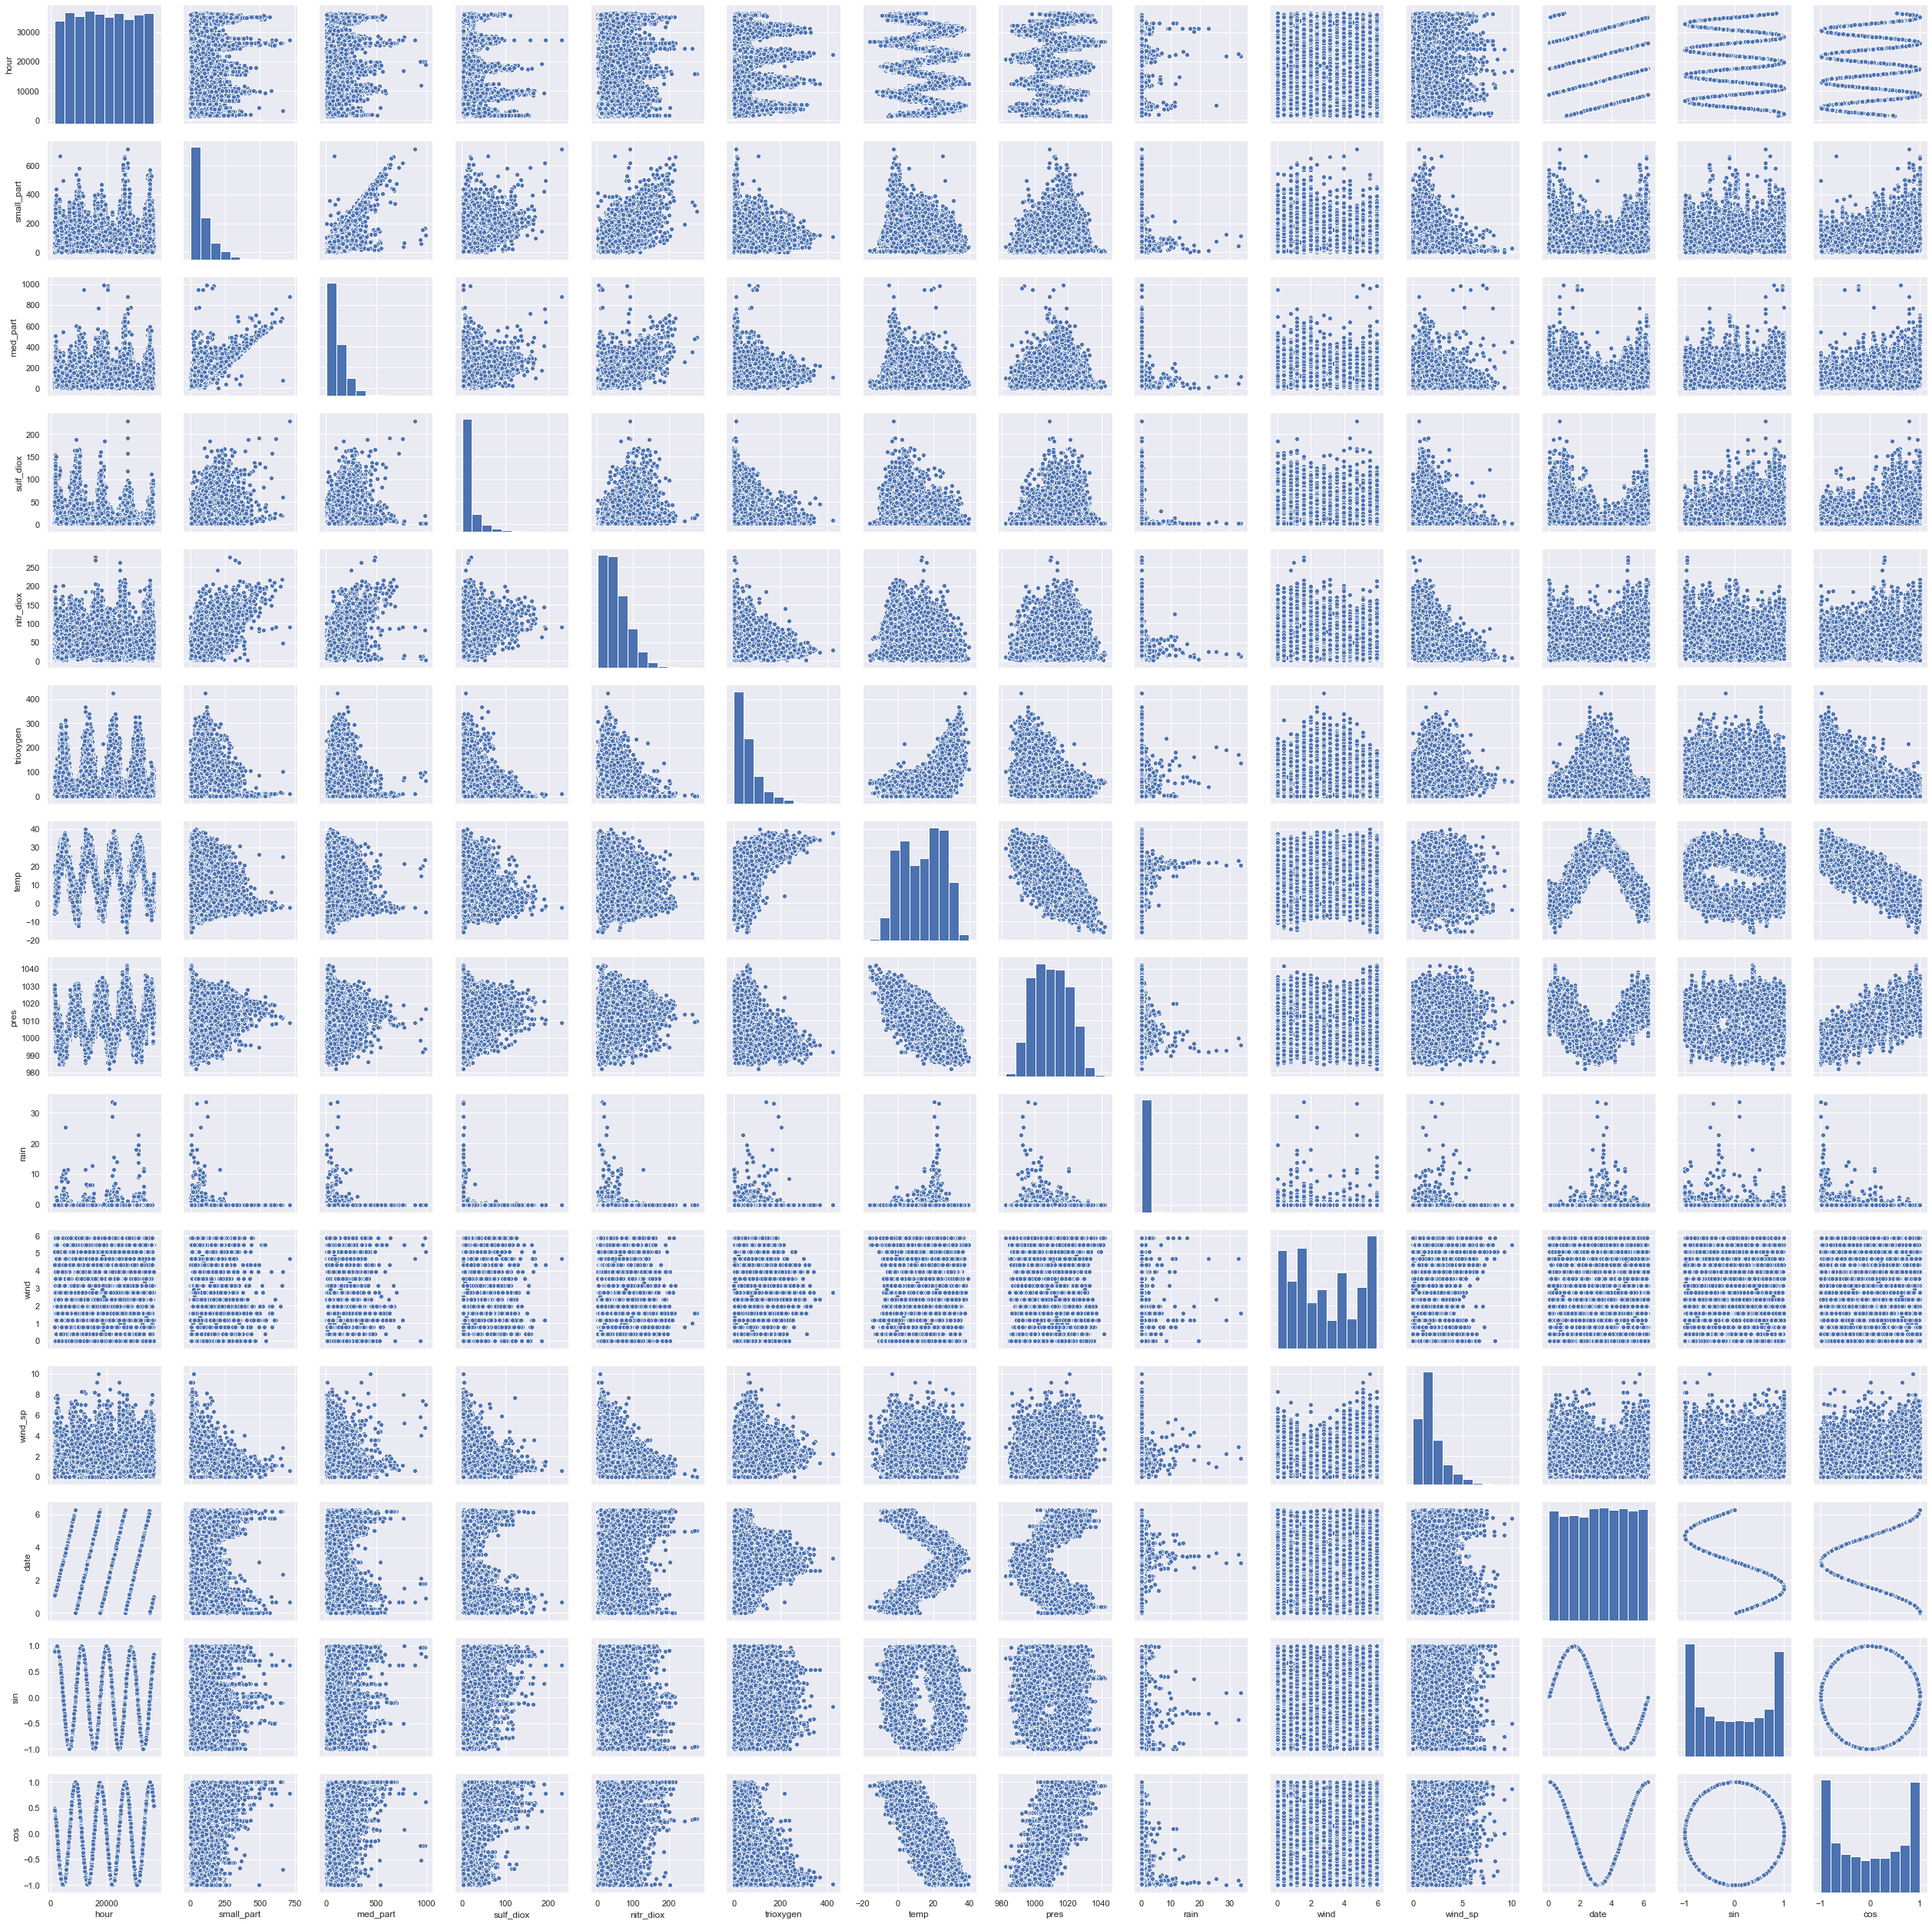

In [36]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.5)
plt.show();

In [37]:
df=pd.concat([data,target],1)
df.drop('wind',1,inplace=True)
df.drop('pres',1,inplace=True)
df.drop('wind_sp',1,inplace=True)
df.drop('date',1,inplace=True)
df.drop('med_part',1,inplace=True)
#df.drop('temp',1,inplace=True)
#df.drop('rain',1,inplace=True)


In [38]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

####for the sunsequent test on a reduced dataset (as explained in the pdf):
#X=df.iloc[:13000,:-1]
#y=df.iloc[:13000,-1]
#x_t=df.iloc[13000:,:-1]
#y_t=df.iloc[13000:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=12)


In [39]:
scaler = StandardScaler().fit(X_train) 
scaled_X_train = scaler.transform(X_train)
X_train = pd.DataFrame(scaled_X_train)
X_train.columns = X.columns

scaled_X_test = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_X_test)
X_test.columns = X.columns

In [40]:
from sklearn.svm import SVR

regressor = SVR()

parameters = {'C': [1000],
             'epsilon': [0.1,1],
             'gamma':['auto','scale'],
             'kernel': ['rbf','poly'],
             'degree': [1,2]
             }

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=10,n_jobs=-1, verbose = 10,scoring="neg_mean_absolute_error",) #with no params it reduces to a CV
gs = gs.fit(X_train,y_train)
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
gs.score(X_test, y_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.8min finished


***GRIDSEARCH RESULTS***
Best score: -284.871612 using {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
-284.887595 (15.388908) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
-387.802940 (18.160607) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
-284.913044 (15.399474) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
-387.803406 (18.160569) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
-284.871612 (15.376275) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
-387.800707 (18.150666) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'poly'}
-284.896074 (15.395600) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
-387.800216 (18.150925) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'poly'}
-284.887595 (15.388908) with: {'

-275.0784920027808

In [41]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -284.871612 using {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
-284.887595 (15.388908) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
-387.802940 (18.160607) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
-284.913044 (15.399474) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
-387.803406 (18.160569) with: {'C': 1000, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
-284.871612 (15.376275) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
-387.800707 (18.150666) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'poly'}
-284.896074 (15.395600) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
-387.800216 (18.150925) with: {'C': 1000, 'degree': 1, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'poly'}
-284.887595 (15.388908) with: {'

-275.0784920027808

In [42]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

#second test on smaller dataset
#print("MAE test: ", metrics.mean_absolute_error(y_t, gs.predict(x_t))) 
#print("MSE test: ",metrics.mean_squared_error(y_t, gs.predict(x_t)))
#print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_t, gs.predict(x_t))))
#print("r2: ",np.sqrt(metrics.r2_score(y_t, gs.predict(x_t))))

MAE train:  266.20697832751455
MSE train:  265641.461928881
RMSE train:  515.4041733716182
r2:  0.9020177313521154
MAE test:  275.0784920027808
MSE test:  287308.2687783966
RMSE test:  536.0114446337844
r2:  0.8820341833392678


In [43]:
metrics.explained_variance_score(y_test, gs.predict(X_test))

0.7792505683171753